In [ ]:
import os
os.environ['KAGGLE_USERNAME']="KAGGLE_USERNAME"
os.environ['KAGGLE_KEY']="KAGGLE_KEY"
!kaggle datasets download abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:39<00:00, 23.3MB/s]
100% 2.04G/2.04G [01:39<00:00, 22.1MB/s]


In [ ]:
!unzip plantvillage-dataset.zip

In [ ]:
import splitfolders
from skimage.io import  imread, imshow
from skimage.transform import  resize, rescale
from skimage.color import rgb2gray
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2,InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
os.mkdir('images')

# Make subdirectories train, val, test
os.mkdir(os.path.join('images', 'train'))
os.mkdir(os.path.join('images', 'val'))
os.mkdir(os.path.join('images', 'test'))


In [ ]:
direct='/content/plantvillage dataset/color'
splitfolders.ratio(direct,output = "images",seed = 42,ratio = (0.70,0.15,0.15))

Copying files: 54305 files [00:17, 3057.13 files/s]


In [ ]:
train_data_dir = '/content/images/train'
test_data_dir = '/content/images/test'
validation_data_dir = '/content/images/val'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load and prepare the data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 37997 images belonging to 38 classes.
Found 8129 images belonging to 38 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=output)


87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Epoch 1/10
594/594 [==============================] - 570s 918ms/step - loss: 0.3799 - accuracy: 0.8749 - val_loss: 0.3592 - val_accuracy: 0.8846
Epoch 2/10
594/594 [==============================] - 565s 952ms/step - loss: 0.3480 - accuracy: 0.8849 - val_loss: 0.3729 - val_accuracy: 0.8796
Epoch 3/10
594/594 [==============================] - 548s 923ms/step - loss: 0.3252 - accuracy: 0.8908 - val_loss: 0.3106 - val_accuracy: 0.8985
Epoch 4/10
594/594 [==============================] - 568s 957ms/step - loss: 0.3127 - accuracy: 0.8962 - val_loss: 0.3590 - val_accuracy: 0.8818
Epoch 5/10
594/594 [==============================] - 547s 921ms/step - loss: 0.2976 - accuracy: 0.8992 - val_loss: 0.3086 - val_accuracy: 0.8991
Epoch 6/10
594/594 [==============================] - 540s 910ms/step - loss: 0.3011 - accuracy: 0.8995 - val_loss: 0.2810 - val_accuracy: 0.9063
Epoch 7/10
594/594 [==============================] - 552s 929ms/step - loss: 0.2842 - accuracy: 0.9060 - val_loss: 0.2810 -

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8179 images belonging to 38 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

256/256 [==============================] - 31s 113ms/step - loss: 0.2620 - accuracy: 0.9125
Test accuracy: 0.9124587178230286


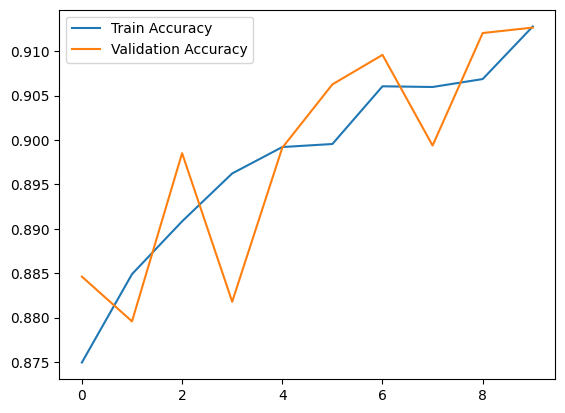

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

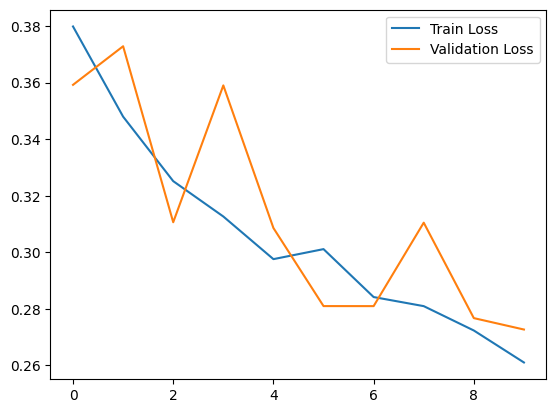

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()